In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [2]:
# create some fake data
#
# We will consider the charging of a capacitor - V = V_f(1 - e^(-t/RC))

R = 1.0E+6
C = 1.0E-6
Vf = 4.0

npts = 11
xlow = 0.5
xhigh = 5.0

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.05)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

yi = Vf*(1.0 - np.exp(-xi/(R*C))) + yrandom
eyi = yi*0.02

Text(0.5, 1.0, 'Charging a Capacitor')

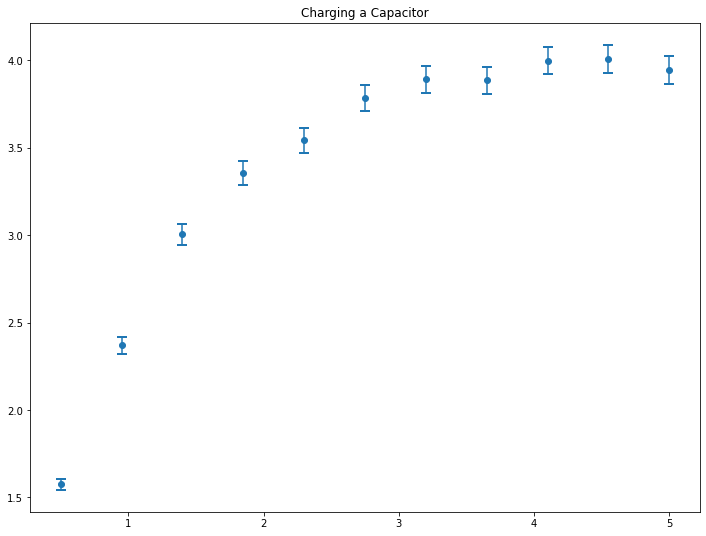

In [3]:
# Let's plot this data, just to see what it looks like

plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.errorbar(xi,yi,yerr=eyi, fmt='o', capsize=5, capthick=2)
plot1.set_title("Charging a Capacitor")

In [4]:
# First, define a "fitting function", in this case the known formula for charging a capacitor

def charging_fit_function(x,*par):
    return par[0]*(1.0 - np.exp(-x/par[1]))

In [5]:
# Let's use the curve_fit package from scipy!

from scipy.optimize import curve_fit

# now, for this non-linear fit, we MUST provide some initial values for the parameters!!!!!
#
# compared to the linear fit example, we need to add a couple of parameters to the call
# to curve fit:
#
# sigma=eyi  ... this tells curve_fit to take into account errors in the y-values
# absolute_sigma = True ... this tells curve_fit to consider the actual error values, rather
#                           than just the relative difference between error values.

init_vals = [4.0,1.0]
popt, pcov = curve_fit(charging_fit_function,xi,yi,p0=init_vals,sigma=eyi,absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print ("Covariance Matrix:")
print(pcov)
print()
print ("Best Fit Parameters (expect 3.0 and 1.0, nominally):")
print(popt)
print()
print ("Errors in Fit Parameters:")
print(perr)

Covariance Matrix:
[[0.0014509  0.00078142]
 [0.00078142 0.00070938]]

Best Fit Parameters (expect 3.0 and 1.0, nominally):
[4.02814292 1.03104872]

Errors in Fit Parameters:
[0.03809064 0.02663424]


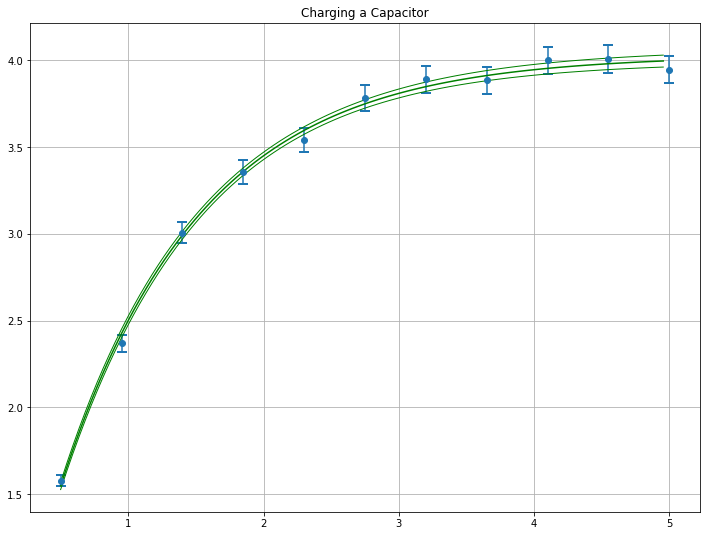

In [6]:
# Now, let's do some plotting magic!

# define a finely spaced array of x points, and then evaluate the y-values at
# each of these points, using the linear fit function with the best fit parameters from
# curve_fit

nfitpoints = 100
dx = (xhigh-xlow)/nfitpoints

xfitting = []
yfitting = []
for i in range(0,nfitpoints):
    xfitting.append(xlow+dx*i)
    yfitting.append(charging_fit_function(xfitting[i],*popt))
xfitting = np.array(xfitting)
yfitting = np.array(yfitting)
    
plot1.plot(xfitting,yfitting,'g-')

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([charging_fit_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

plot1.plot(xfitting,lower,'g-',linewidth=1)
plot1.plot(xfitting,upper,'g-',linewidth=1)

plot1.grid()

figure